In [1]:
import pandas as pd

# Load the uploaded dataset
file_path = 'ev_adoption_dataset.csv'
ev_adoption_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
ev_adoption_data.head()


,country,year,total_vehicles_registered,ev_vehicles_registered,ev_percentage_share,charging_stations_count,avg_cost_ev,avg_cost_gasoline_vehicle,gov_incentive_amount,co2_emissions_per_vehicle,fuel_price_per_liter,electricity_price_per_kWh
0,United States,2015,19942603,46048,0.23,8524,36696.32,31047.07,9935,108.69,1.31,0.11
1,United States,2016,20341455,48523,0.24,9376,36559.14,27580.33,1434,156.12,1.66,0.24
2,United States,2017,20748284,53879,0.26,10314,42585.59,26738.14,5557,180.94,0.81,0.26
3,United States,2018,21163249,63042,0.30,11345,50944.18,25103.76,3547,121.53,1.72,0.12
4,United States,2019,21586514,77728,0.36,12479,41397.82,25384.69,6635,160.37,1.77,0.25


'ev_vs_gasoline_cost_comparison.png'

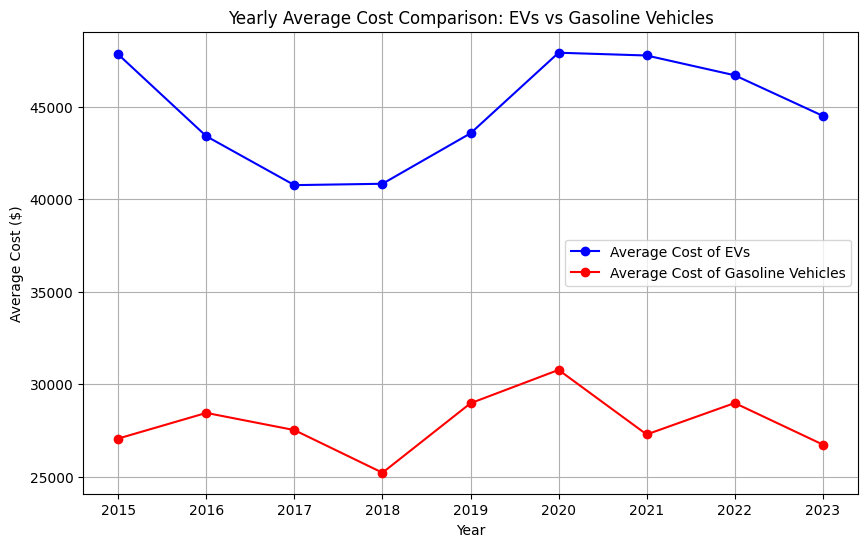

In [5]:
import matplotlib.pyplot as plt
# Grouping the dataset by 'year' and calculating the average cost for EVs and gasoline vehicles
yearly_cost_comparison = ev_adoption_data.groupby('year')[['avg_cost_ev', 'avg_cost_gasoline_vehicle']].mean()

# Save the generated graph as an image file
graph_file_path = 'ev_vs_gasoline_cost_comparison.png'
plt.figure(figsize=(10, 6))
plt.plot(yearly_cost_comparison.index, yearly_cost_comparison['avg_cost_ev'], label='Average Cost of EVs', color='blue', marker='o')
plt.plot(yearly_cost_comparison.index, yearly_cost_comparison['avg_cost_gasoline_vehicle'], label='Average Cost of Gasoline Vehicles', color='red', marker='o')

# Adding titles and labels
plt.title('Yearly Average Cost Comparison: EVs vs Gasoline Vehicles')
plt.xlabel('Year')
plt.ylabel('Average Cost ($)')
plt.legend()

# Display the plot
plt.grid(True)

# Save the plot as an image file
plt.savefig(graph_file_path)

# Provide the file path to the user
graph_file_path



'co2_emissions_comparison_ev_vs_gasoline.png'

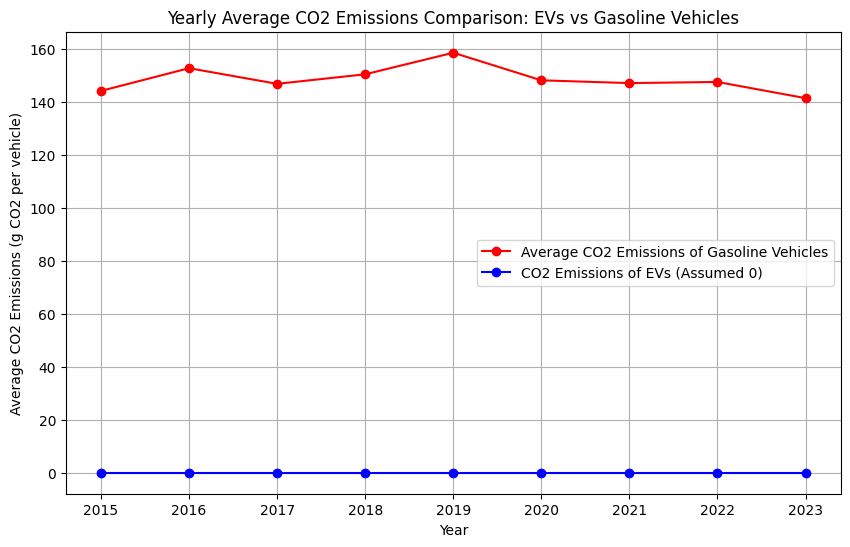

In [8]:
# Adding a column for EV CO2 emissions (set to 0 as EVs have zero direct emissions)
ev_adoption_data['co2_emissions_ev'] = 0

# Grouping the dataset by 'year' and calculating the average CO2 emissions for EVs and gasoline vehicles
yearly_co2_comparison = ev_adoption_data.groupby('year')[['co2_emissions_per_vehicle', 'co2_emissions_ev']].mean()

# Save the generated CO2 emissions comparison graph as a PNG file
co2_graph_file_path = 'co2_emissions_comparison_ev_vs_gasoline.png'

# Plotting the comparison of CO2 emissions for EVs and gasoline vehicles
plt.figure(figsize=(10, 6))
plt.plot(yearly_co2_comparison.index, yearly_co2_comparison['co2_emissions_per_vehicle'], label='Average CO2 Emissions of Gasoline Vehicles', color='red', marker='o')
plt.plot(yearly_co2_comparison.index, yearly_co2_comparison['co2_emissions_ev'], label='CO2 Emissions of EVs (Assumed 0)', color='blue', marker='o')

# Adding titles and labels
plt.title('Yearly Average CO2 Emissions Comparison: EVs vs Gasoline Vehicles')
plt.xlabel('Year')
plt.ylabel('Average CO2 Emissions (g CO2 per vehicle)')
plt.legend()

# Display the plot
plt.grid(True)

# Save the plot as an image file
plt.savefig(co2_graph_file_path)

# Provide the file path to the user
co2_graph_file_path



C:\Users\HP\AppData\Local\Temp\ipykernel_2780\1297554989.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data['annual_fuel_cost'] = (us_data['fuel_price_per_liter'] * miles_driven_per_year) / avg_fuel_efficiency_mpg * liters_per_gallon
C:\Users\HP\AppData\Local\Temp\ipykernel_2780\1297554989.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data['annual_electricity_cost'] = (us_data['electricity_price_per_kWh'] * miles_driven_per_year) / 100  # Assuming the electric range per charge is 100 mil

'us_operational_cost_comparison_fuel_vs_ev_with_values_updated.png'

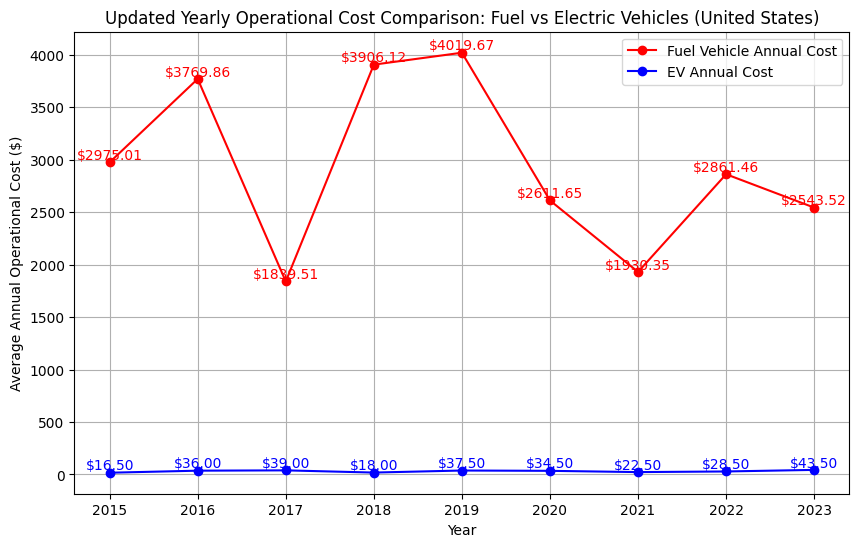

In [13]:
# Filter the dataset to include only data from the United States
us_data = ev_adoption_data[ev_adoption_data['country'] == 'United States']
# Assume 15,000 miles driven per year
miles_driven_per_year = 15000

# Updated fuel cost calculation with the correct formula
liters_per_gallon = 3.785  # 1 gallon = 3.785 liters
# Define the average fuel efficiency for gasoline vehicles (in miles per gallon)
avg_fuel_efficiency_mpg = 25  # Assumed average for gasoline vehicles

# Recalculate the operational costs for both fuel and electric vehicles (United States)
us_data['annual_fuel_cost'] = (us_data['fuel_price_per_liter'] * miles_driven_per_year) / avg_fuel_efficiency_mpg * liters_per_gallon
us_data['annual_electricity_cost'] = (us_data['electricity_price_per_kWh'] * miles_driven_per_year) / 100  # Assuming the electric range per charge is 100 miles for simplicity

# Grouping by year to calculate the updated average operational costs for both gasoline and electric vehicles (United States)
us_yearly_operational_cost_comparison_updated = us_data.groupby('year')[['annual_fuel_cost', 'annual_electricity_cost']].mean()

# Plotting the updated comparison of operational costs for fuel vs electric vehicles (United States)
plt.figure(figsize=(10, 6))
plt.plot(us_yearly_operational_cost_comparison_updated.index, us_yearly_operational_cost_comparison_updated['annual_fuel_cost'], label='Fuel Vehicle Annual Cost', color='red', marker='o')
plt.plot(us_yearly_operational_cost_comparison_updated.index, us_yearly_operational_cost_comparison_updated['annual_electricity_cost'], label='EV Annual Cost', color='blue', marker='o')

# Annotating the cost values for each year
for year, fuel_cost, ev_cost in zip(us_yearly_operational_cost_comparison_updated.index,
                                    us_yearly_operational_cost_comparison_updated['annual_fuel_cost'],
                                    us_yearly_operational_cost_comparison_updated['annual_electricity_cost']):
    plt.text(year, fuel_cost, f"${fuel_cost:.2f}", color='red', ha='center', va='bottom')
    plt.text(year, ev_cost, f"${ev_cost:.2f}", color='blue', ha='center', va='bottom')

# Adding titles and labels
plt.title('Updated Yearly Operational Cost Comparison: Fuel vs Electric Vehicles (United States)')
plt.xlabel('Year')
plt.ylabel('Average Annual Operational Cost ($)')
plt.legend()

# Display the plot
plt.grid(True)

# Save the updated plot as a PNG image with cost values displayed
us_operational_cost_graph_file_path_with_values = 'us_operational_cost_comparison_fuel_vs_ev_with_values_updated.png'
plt.savefig(us_operational_cost_graph_file_path_with_values)

# Provide the file path for the user to download
us_operational_cost_graph_file_path_with_values



'us_gov_incentives_vs_ev_adoption.png'

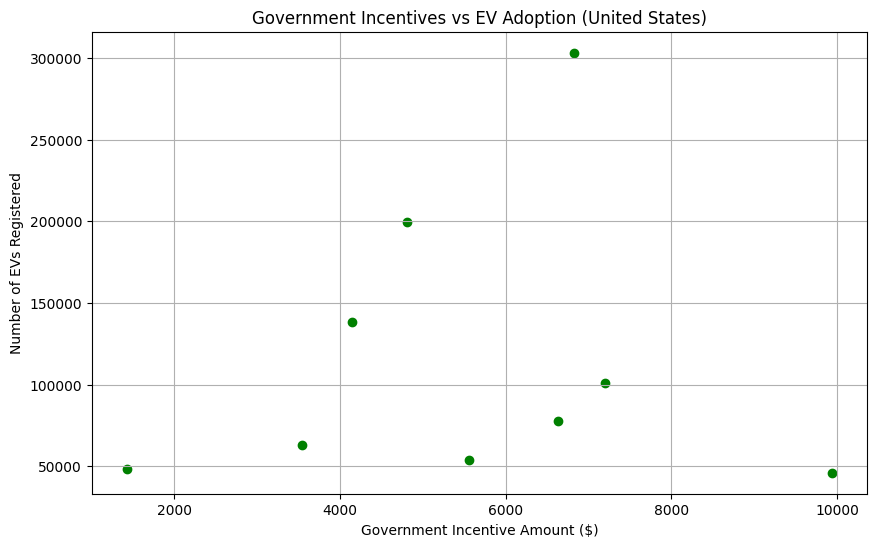

In [15]:
# Plotting the relationship between government incentives and EV adoption for United States data
plt.figure(figsize=(10, 6))
plt.scatter(us_data['gov_incentive_amount'], us_data['ev_vehicles_registered'], color='green')

# Adding titles and labels
plt.title('Government Incentives vs EV Adoption (United States)')
plt.xlabel('Government Incentive Amount ($)')
plt.ylabel('Number of EVs Registered')

# Display the plot
plt.grid(True)

# Save the plot as a PNG image
us_gov_incentive_graph_file_path = 'us_gov_incentives_vs_ev_adoption.png'
plt.savefig(us_gov_incentive_graph_file_path)

# Provide the file path for the user to download
us_gov_incentive_graph_file_path


In [ ]:
#new dataset

In [2]:
# Import necessary libraries
import pandas as pd

# Load the newly uploaded dataset
file_path = 'station_data_dataverse.csv'
station_data_final = pd.read_csv(file_path)

# Display the first few rows to understand its structure
station_data_final.head()


,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,3,0,0,1,0,0,0,0,0
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,...,0,3,0,0,0,0,1,0,0,0
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,...,0,3,0,0,1,0,0,0,0,0
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,...,0,3,0,0,0,1,0,0,0,0


In [3]:
# Convert 'created' and 'ended' columns to datetime
station_data_final['created'] = pd.to_datetime(station_data_final['created'], errors='coerce')
station_data_final['ended'] = pd.to_datetime(station_data_final['ended'], errors='coerce')

# Handle missing values in essential columns (e.g., kwhTotal, dollars, chargeTimeHrs)
# We'll drop rows where key data is missing (such as energy consumption, cost, and charge time)
station_data_cleaned = station_data_final.dropna(subset=['kwhTotal', 'dollars', 'chargeTimeHrs'])

# Filter out zero-cost charging sessions
station_data_cleaned = station_data_cleaned[station_data_cleaned['dollars'] > 0]

# Check for missing values after cleaning
missing_values_cleaned = station_data_cleaned.isnull().sum()

# Get basic statistics on the energy consumption and charging times
basic_stats_cleaned = station_data_cleaned[['kwhTotal', 'dollars', 'chargeTimeHrs']].describe()

# Display the cleaned data and basic statistics
missing_values_cleaned, basic_stats_cleaned, station_data_cleaned.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_4012\1442491616.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  station_data_final['created'] = pd.to_datetime(station_data_final['created'], errors='coerce')
C:\Users\HP\AppData\Local\Temp\ipykernel_4012\1442491616.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  station_data_final['ended'] = pd.to_datetime(station_data_final['ended'], errors='coerce')


(sessionId           0
 kwhTotal            0
 dollars             0
 created           379
 ended             379
 startTime           0
 endTime             0
 chargeTimeHrs       0
 weekday             0
 platform            0
 distance          159
 userId              0
 stationId           0
 locationId          0
 managerVehicle      0
 facilityType        0
 Mon                 0
 Tues                0
 Wed                 0
 Thurs               0
 Fri                 0
 Sat                 0
 Sun                 0
 reportedZip         0
 dtype: int64,
          kwhTotal     dollars  chargeTimeHrs
 count  379.000000  379.000000     379.000000
 mean     6.658496    1.059420       5.041161
 std      2.917580    1.085683       2.830525
 min      0.000000    0.500000       4.000278
 25%      5.740000    0.500000       4.178056
 50%      6.660000    0.500000       4.514722
 75%      6.920000    1.170000       5.212500
 max     23.680000    7.500000      55.238056,
     sessionId  kw

In [4]:
# Inspect the raw values of 'created' and 'ended' columns to identify the formatting issue
station_data_final[['created', 'ended']].head(20)


,created,ended
0,NaT,NaT
1,NaT,NaT
2,NaT,NaT
3,NaT,NaT
4,NaT,NaT
5,NaT,NaT
6,NaT,NaT
7,NaT,NaT
8,NaT,NaT
9,NaT,NaT


In [5]:
# Load the raw file to inspect the 'created' and 'ended' columns directly
station_data_raw = pd.read_csv(file_path)

# Inspect the raw values of 'created' and 'ended' columns to identify any formatting issues
station_data_raw[['created', 'ended']].head(20)


,created,ended
0,0014-11-18 15:40:26,0014-11-18 17:11:04
1,0014-11-19 17:40:26,0014-11-19 19:51:04
2,0014-11-21 12:05:46,0014-11-21 16:46:04
3,0014-12-03 19:16:12,0014-12-03 21:02:18
4,0014-12-11 20:56:11,0014-12-11 21:14:06
5,0014-12-12 14:38:44,0014-12-12 15:04:04
6,0014-12-12 15:08:40,0014-12-12 15:47:04
7,0014-12-17 20:30:25,0014-12-17 21:31:04
8,0014-12-18 17:53:19,0014-12-18 18:04:04
9,0014-12-18 18:06:49,0014-12-18 18:30:05


In [6]:
# Fix the year format by adding 2000 to the year part of the 'created' and 'ended' columns
station_data_raw['created'] = station_data_raw['created'].str.replace(r'^\d{2}(\d{2})', r'20\1', regex=True)
station_data_raw['ended'] = station_data_raw['ended'].str.replace(r'^\d{2}(\d{2})', r'20\1', regex=True)

# Reconvert 'created' and 'ended' to datetime after adjusting the year format
station_data_raw['created'] = pd.to_datetime(station_data_raw['created'], errors='coerce')
station_data_raw['ended'] = pd.to_datetime(station_data_raw['ended'], errors='coerce')

# Display the first few rows of 'created' and 'ended' columns after conversion
station_data_raw[['created', 'ended']].head()


,created,ended
0,2014-11-18 15:40:26,2014-11-18 17:11:04
1,2014-11-19 17:40:26,2014-11-19 19:51:04
2,2014-11-21 12:05:46,2014-11-21 16:46:04
3,2014-12-03 19:16:12,2014-12-03 21:02:18
4,2014-12-11 20:56:11,2014-12-11 21:14:06


In [8]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


C:\Users\HP\AppData\Local\Temp\ipykernel_4012\38052977.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=station_data_raw, x='weekday', order=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], palette='Set2')


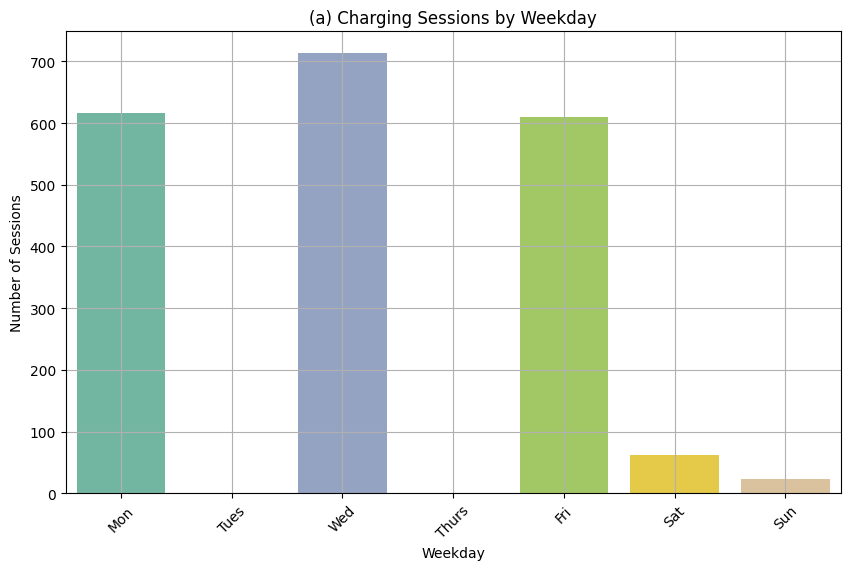

C:\Users\HP\AppData\Local\Temp\ipykernel_4012\38052977.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=station_data_raw, x='hour_of_day', palette='Set2')


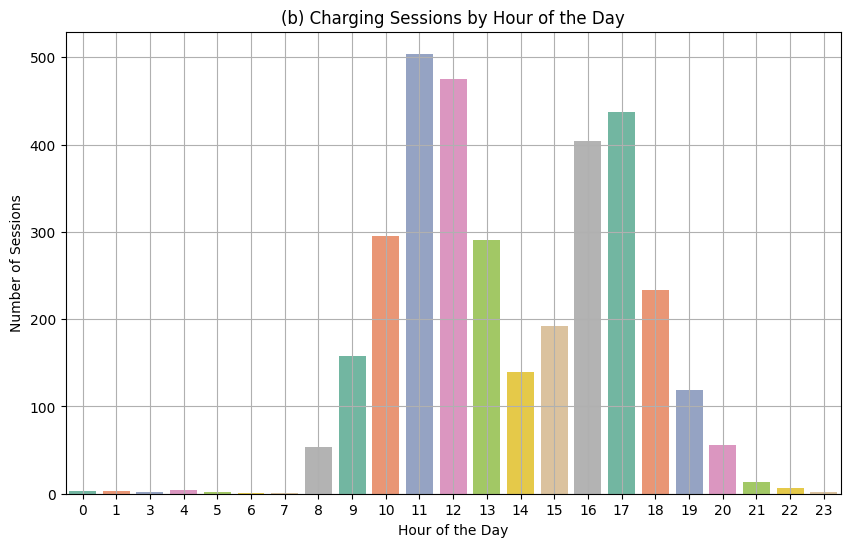

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Recalculate session duration (in hours) based on the corrected timestamps
station_data_raw['calculatedChargeTimeHrs'] = (station_data_raw['ended'] - station_data_raw['created']).dt.total_seconds() / 3600

# Now let's analyze the charging session patterns
# Extract 'weekday' and 'hour_of_day' from the 'created' column
station_data_raw['weekday'] = station_data_raw['created'].dt.strftime('%a')  # Weekday abbreviation
station_data_raw['hour_of_day'] = station_data_raw['created'].dt.hour  # Hour of the day

Charging_Sessions_Weekday_file_path = 'Charging Sessions by Weekday.png'
Charging_Sessions_hour_file_path = 'Charging_Sessions by hour.png'

# Plot the distribution of charging sessions by weekday
plt.figure(figsize=(10, 6))
sns.countplot(data=station_data_raw, x='weekday', order=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], palette='Set2')
plt.title('(a) Charging Sessions by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(Charging_Sessions_Weekday_file_path)
plt.show()

# Plot the distribution of charging sessions by hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(data=station_data_raw, x='hour_of_day', palette='Set2')
plt.title('(b) Charging Sessions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Sessions')
plt.grid(True)
plt.savefig(Charging_Sessions_hour_file_path)
plt.show()


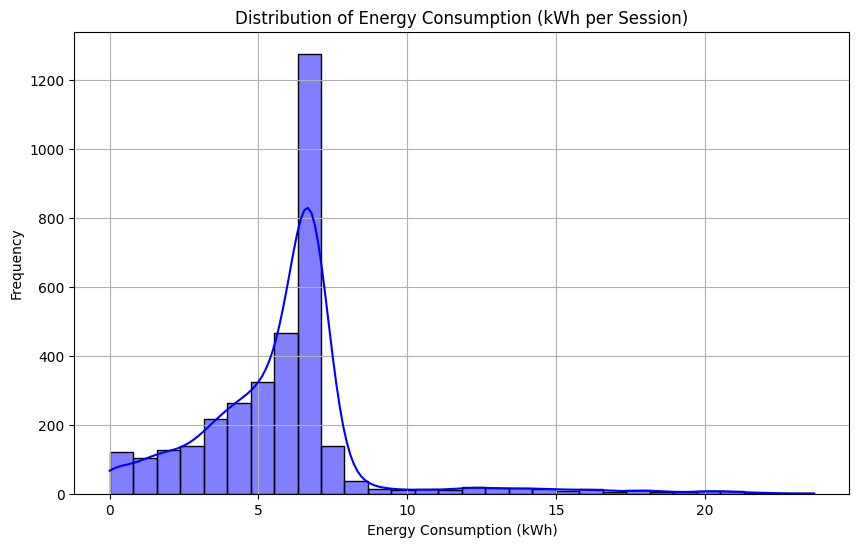

np.float64(5.809628865979382)

In [12]:
# Plot the distribution of energy consumption per session (kwhTotal)
energy_consumption_file_path = 'energy consumption.png'
plt.figure(figsize=(10, 6))
sns.histplot(station_data_raw['kwhTotal'], bins=30, kde=True, color='blue')
plt.title('Distribution of Energy Consumption (kWh per Session)')
plt.xlabel('Energy Consumption (kWh)')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig(energy_consumption_file_path)
plt.show()

# Calculate the average energy consumption (kWh) per session
avg_kwh_consumption = station_data_raw['kwhTotal'].mean()
avg_kwh_consumption


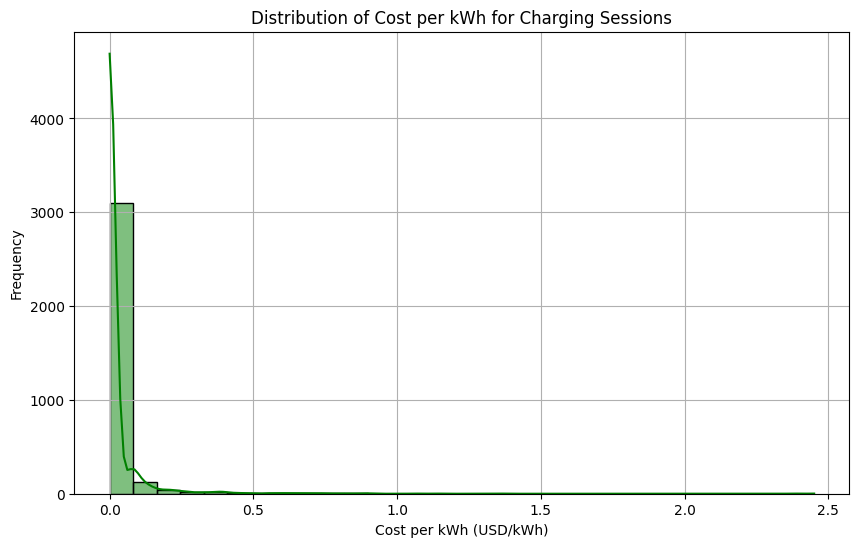

np.float64(inf)

In [9]:
# Calculate the cost per kWh for each charging session
station_data_raw['cost_per_kwh'] = station_data_raw['dollars'] / station_data_raw['kwhTotal']

# Plot the distribution of cost per kWh
cost_distribution_file_path = 'cost distribution.png'
plt.figure(figsize=(10, 6))
sns.histplot(station_data_raw['cost_per_kwh'], bins=30, kde=True, color='green')
plt.title('Distribution of Cost per kWh for Charging Sessions')
plt.xlabel('Cost per kWh (USD/kWh)')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig(cost_distribution_file_path)
plt.show()

# Calculate the average cost per kWh
avg_cost_per_kwh = station_data_raw['cost_per_kwh'].mean()
avg_cost_per_kwh


C:\Users\HP\AppData\Local\Temp\ipykernel_4012\69905237.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data_filtered['cost_per_kwh'] = station_data_filtered['dollars'] / station_data_filtered['kwhTotal']


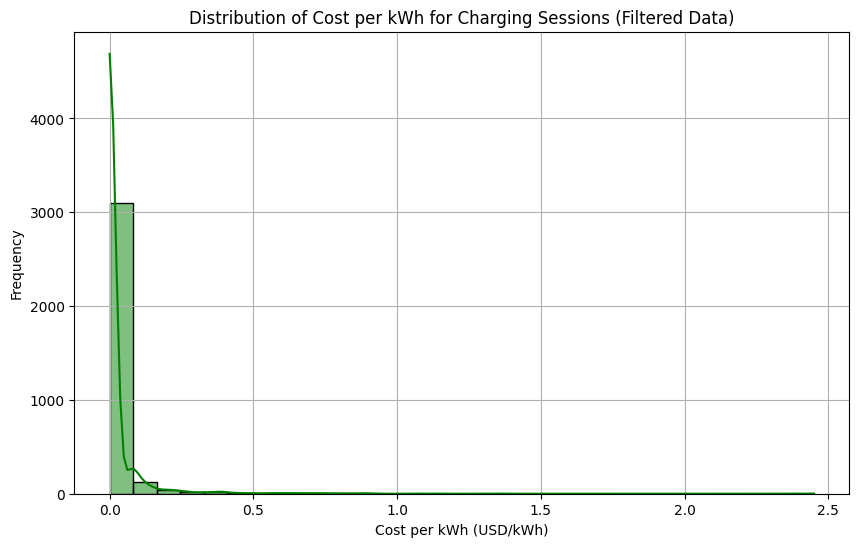

np.float64(0.02195332209770339)

In [10]:
# Filter out rows where 'kwhTotal' is zero to avoid division by zero
station_data_filtered = station_data_raw[station_data_raw['kwhTotal'] > 0]

# Recalculate the cost per kWh for the filtered data
station_data_filtered['cost_per_kwh'] = station_data_filtered['dollars'] / station_data_filtered['kwhTotal']

# Plot the distribution of cost per kWh again
cost_distribution_filtered_file_path = 'cost distribution filtered.png'
plt.figure(figsize=(10, 6))
sns.histplot(station_data_filtered['cost_per_kwh'], bins=30, kde=True, color='green')
plt.title('Distribution of Cost per kWh for Charging Sessions (Filtered Data)')
plt.xlabel('Cost per kWh (USD/kWh)')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig(cost_distribution_filtered_file_path)
plt.show()

# Calculate the average cost per kWh after filtering out zero-energy sessions
avg_cost_per_kwh_filtered = station_data_filtered['cost_per_kwh'].mean()
avg_cost_per_kwh_filtered


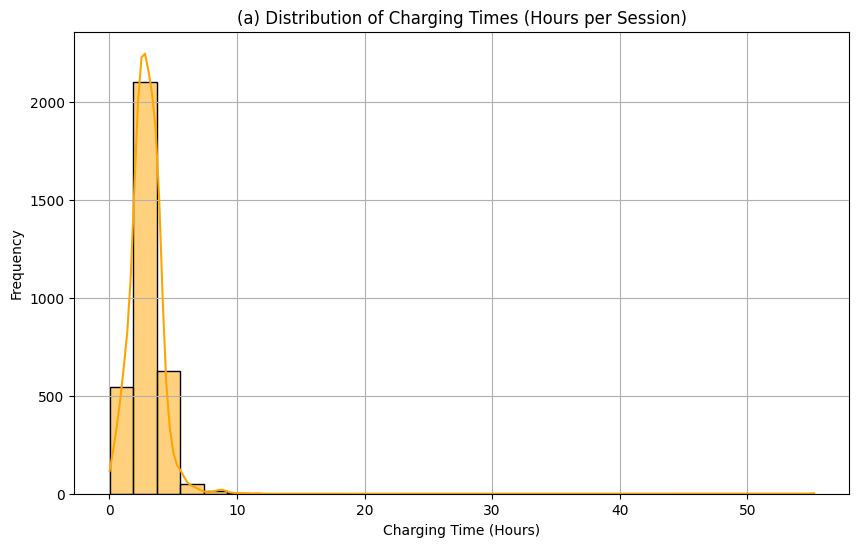

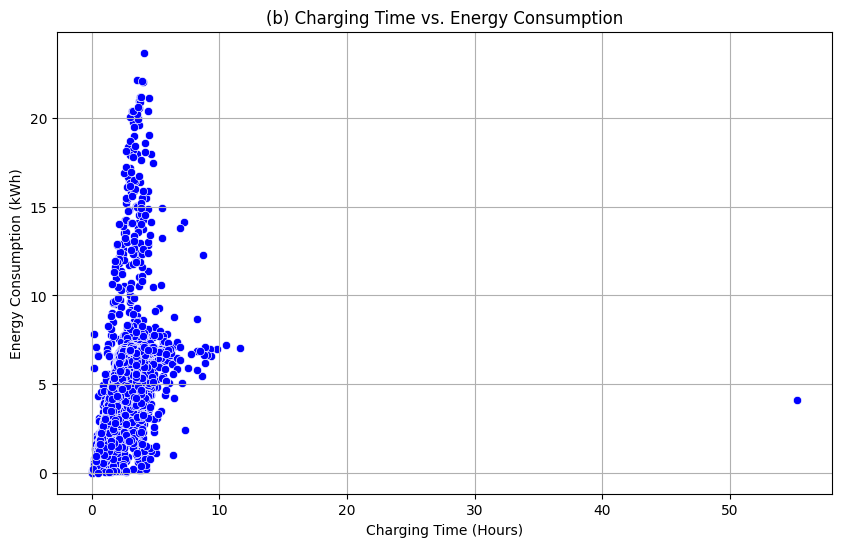

np.float64(0.2802603616078579)

In [12]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Replot the distribution of charging times (calculatedChargeTimeHrs)
charging_time_distribution_path = 'charging_time_distribution.png'
plt.figure(figsize=(10, 6))
sns.histplot(station_data_filtered['calculatedChargeTimeHrs'], bins=30, kde=True, color='orange')
plt.title('(a) Distribution of Charging Times (Hours per Session)')
plt.xlabel('Charging Time (Hours)')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig(charging_time_distribution_path)
plt.show()

# Re-analyze the relationship between charging time and energy consumption
charging_time_vs_energy_consumption_path = 'charging_time_vs_energy_consumption.png'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=station_data_filtered, x='calculatedChargeTimeHrs', y='kwhTotal', color='blue')
plt.title('(b) Charging Time vs. Energy Consumption')
plt.xlabel('Charging Time (Hours)')
plt.ylabel('Energy Consumption (kWh)')
plt.grid(True)
plt.savefig(charging_time_vs_energy_consumption_path)
plt.show()

# Calculate the correlation between charging time and energy consumption
correlation_time_energy = station_data_filtered['calculatedChargeTimeHrs'].corr(station_data_filtered['kwhTotal'])
correlation_time_energy


In [16]:
# Import pandas for data handling
import pandas as pd

# Load the new dataset (EV Predictive Maintenance Dataset)
maintenance_file_path = 'EV_Predictive_Maintenance_Dataset_15min.csv'
maintenance_data = pd.read_csv(maintenance_file_path)

# Display the first few rows to understand its structure
maintenance_data.head()


,Timestamp,SoC,SoH,Battery_Voltage,Battery_Current,Battery_Temperature,Charge_Cycles,Motor_Temperature,Motor_Vibration,Motor_Torque,...,Load_Weight,Driving_Speed,Distance_Traveled,Idle_Time,Route_Roughness,RUL,Failure_Probability,Maintenance_Type,TTF,Component_Health_Score
0,2020-01-01 00:00:00,0.826099,0.941338,210.163881,-22.753095,27.149201,149.190930,48.496049,0.369095,113.435589,...,741.754518,103.421162,66.232383,0.520922,0.225970,260.503381,0,1,111.116697,0.852745
1,2020-01-01 00:15:00,0.064728,0.916059,364.000102,-27.701120,53.655101,171.702388,57.829492,1.449195,105.587160,...,769.134035,46.041935,3.146238,0.844005,0.204350,212.813954,0,2,179.229425,0.827616
2,2020-01-01 00:30:00,0.873643,0.908020,388.855089,-36.646406,29.559090,191.617645,46.518363,1.859045,119.610302,...,917.262931,59.588422,79.909148,0.992405,0.175125,273.394511,0,1,171.852663,0.876887
3,2020-01-01 00:45:00,0.853009,0.916476,370.570602,-37.609429,29.690283,111.881817,54.163681,0.381500,182.535625,...,600.598736,44.222285,0.774000,0.007615,0.213264,229.508442,0,0,165.221328,0.816290
4,2020-01-01 01:00:00,0.947540,0.913206,390.011904,-14.275808,28.864338,163.774377,42.075978,0.433927,173.298044,...,613.153029,41.374684,2.872124,0.771938,0.770257,257.302631,1,0,176.890659,0.744260


In [17]:
# Analyze the relationship between Failure Probability, RUL, and other key parameters
# Let's start by checking the correlation between RUL and other numerical features

# Calculate the correlation matrix
correlation_matrix = maintenance_data[['RUL', 'SoC', 'SoH', 'Battery_Voltage', 'Battery_Current', 
                                      'Battery_Temperature', 'Motor_Temperature', 'Motor_Vibration', 
                                      'Motor_Torque', 'Driving_Speed', 'Load_Weight', 'Distance_Traveled', 
                                      'Idle_Time', 'Route_Roughness', 'Failure_Probability']].corr()

# Display the correlation matrix
correlation_matrix['RUL'].sort_values(ascending=False)


RUL                    1.000000
Load_Weight            0.005351
Distance_Traveled      0.004024
Driving_Speed          0.003062
Battery_Voltage        0.001432
Failure_Probability    0.000955
SoH                    0.000747
Idle_Time              0.000351
SoC                   -0.000420
Motor_Temperature     -0.000662
Battery_Current       -0.000696
Motor_Vibration       -0.001678
Motor_Torque          -0.002351
Battery_Temperature   -0.003068
Route_Roughness       -0.004610
Name: RUL, dtype: float64

In [18]:
# Group data by Maintenance Type and calculate the mean of RUL and Failure Probability for each type
maintenance_type_analysis = maintenance_data.groupby('Maintenance_Type')[['RUL', 'Failure_Probability']].mean()

# Display the results
maintenance_type_analysis


,RUL,Failure_Probability
Maintenance_Type,,
0,216.483123,0.097724
1,215.780677,0.103422
2,216.144798,0.098207
3,216.917965,0.101581


In [19]:
# Analyze the correlation between battery health (SoC and SoH) and energy consumption (RUL, Failure Probability, etc.)
battery_health_analysis = maintenance_data[['SoC', 'SoH', 'Battery_Voltage', 'Battery_Current', 'Battery_Temperature', 
                                           'Motor_Temperature', 'Motor_Vibration', 'Motor_Torque', 'RUL', 
                                           'Failure_Probability']].corr()

# Display the correlation between battery health and other features
battery_health_analysis['SoH'].sort_values(ascending=False)


SoH                    1.000000
Motor_Temperature      0.002424
Motor_Torque           0.001495
RUL                    0.000747
Motor_Vibration        0.000680
SoC                    0.000553
Battery_Current        0.000005
Battery_Voltage       -0.000204
Battery_Temperature   -0.002590
Failure_Probability   -0.003277
Name: SoH, dtype: float64

In [21]:
# Load the newly uploaded dataset (Electric and Alternative Fuel Charging Stations)
charging_station_file_path = 'Electric and Alternative Fuel Charging Stations.csv'
charging_station_data = pd.read_csv(charging_station_file_path)

# Display the first few rows to understand its structure
charging_station_data.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_15284\1475398159.py:3: DtypeWarning: Columns (6,16,20,31,33,36,39,40,41,43,46,52,53,55,57,58,60,62) have mixed types. Specify dtype option on import or set low_memory=False.
  charging_station_data = pd.read_csv(charging_station_file_path)


,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,NaN,Montgomery,AL,36107,NaN,NaN,E,...,NaN,NaN,NaN,NaN,B,3600,MD,NaN,NaN,NaN
1,CNG,PS Energy - Atlanta,340 Whitehall St,"From I-7585 N, exit 91 to Central Ave, left on...",Atlanta,GA,30303,NaN,770-350-3000,E,...,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False
2,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,NaN,Atlanta,GA,30324,NaN,NaN,E,...,NaN,NaN,NaN,NaN,Q,3000,LD,NaN,NaN,NaN
3,CNG,United Parcel Service,270 Marvin Miller Dr,NaN,Atlanta,GA,30336,NaN,NaN,E,...,NaN,NaN,NaN,NaN,B,3600,HD,NaN,NaN,NaN
4,CNG,Arkansas Oklahoma Gas Corp,2100 S Waldron Rd,NaN,Fort Smith,AR,72903,NaN,479-783-3188,E,...,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False


In [22]:
# Filter the dataset for charging stations located in Cleveland (City = Cleveland)
cleveland_charging_stations = charging_station_data[charging_station_data['City'] == 'Cleveland']

# Check the number of charging stations in Cleveland
cleveland_charging_stations_count = cleveland_charging_stations.shape[0]

# Display the first few rows of Cleveland charging stations data
cleveland_charging_stations.head(), cleveland_charging_stations_count


(     Fuel Type Code             Station Name      Street Address  \
 919              BD    Glenn Research Center      5577 Taylor Rd   
 923             E85    Glenn Research Center      5577 Taylor Rd   
 930             LPG         Blossman Gas Inc  2739 Highway 129 S   
 2343           ELEC  Baker Electric Building     7100 Euclid Ave   
 4846           ELEC    Glenn Research Center      5577 Taylor Rd   
 
           Intersection Directions       City State    ZIP  Plus4  \
 919                           NaN  Cleveland    OH  44135    NaN   
 923                           NaN  Cleveland    OH  44135    NaN   
 930                           NaN  Cleveland    GA  30528    NaN   
 2343  Euclid Avenue and E 71st St  Cleveland    OH  44103    NaN   
 4846                          NaN  Cleveland    OH  44135    NaN   
 
      Station Phone Status Code  ... EV Pricing (French)  \
 919            NaN           E  ...                 NaN   
 923            NaN           E  ...            

In [23]:
# Check if ZIP codes are available for Cleveland charging stations
zip_code_data = cleveland_charging_stations['ZIP'].value_counts()

# Display the ZIP codes and their counts
zip_code_data


ZIP
44106    10
44113     5
44114     4
30528     4
44135     3
37311     3
44115     2
44103     2
37311     2
74020     1
30528     1
44103     1
44195     1
44129     1
44111     1
77327     1
37312     1
44122     1
44110     1
44109     1
77328     1
44130     1
37312     1
74020     1
44124     1
44128     1
44125     1
44119     1
Name: count, dtype: int64

In [24]:
# Filter out stations that are outside Cleveland's primary ZIP codes (441xx ZIPs)
cleveland_zip_codes = ['44106', '44113', '44114', '44135', '44103', '44125', '44128', '44124', '44119', '44118']

# Filter the dataset for Cleveland-specific ZIP codes
cleveland_charging_stations_filtered = cleveland_charging_stations[cleveland_charging_stations['ZIP'].isin(cleveland_zip_codes)]

# Calculate the density of charging stations per ZIP code in Cleveland
charging_station_density = cleveland_charging_stations_filtered['ZIP'].value_counts().reset_index()
charging_station_density.columns = ['ZIP', 'Station Count']

# Display the charging station density by ZIP code
charging_station_density


,ZIP,Station Count
0,44106,10
1,44113,5
2,44114,4
3,44103,2
4,44124,1
5,44128,1
6,44125,1
7,44119,1


In [25]:
# Filter for stations that have DC Fast Chargers using the 'EV DC Fast Count' column
dc_fast_chargers = cleveland_charging_stations[cleveland_charging_stations['EV DC Fast Count'] > 0]

# Count the number of DC Fast Chargers by ZIP code
dc_fast_chargers_density = dc_fast_chargers['ZIP'].value_counts().reset_index()
dc_fast_chargers_density.columns = ['ZIP', 'DC Fast Charger Count']

# Display the distribution of DC Fast Chargers by ZIP code
dc_fast_chargers_density


,ZIP,DC Fast Charger Count
0,30528,2
1,44122,1
2,74020,1
3,44113,1


In [26]:
# Re-load the EV Adoption Dataset to proceed with the analysis
ev_adoption_file_path = 'EV_Predictive_Maintenance_Dataset_15min.csv'
ev_adoption_data_cleaned = pd.read_csv(ev_adoption_file_path)

# Display the first few rows to understand its structure
ev_adoption_data_cleaned.head()


,Timestamp,SoC,SoH,Battery_Voltage,Battery_Current,Battery_Temperature,Charge_Cycles,Motor_Temperature,Motor_Vibration,Motor_Torque,...,Load_Weight,Driving_Speed,Distance_Traveled,Idle_Time,Route_Roughness,RUL,Failure_Probability,Maintenance_Type,TTF,Component_Health_Score
0,2020-01-01 00:00:00,0.826099,0.941338,210.163881,-22.753095,27.149201,149.190930,48.496049,0.369095,113.435589,...,741.754518,103.421162,66.232383,0.520922,0.225970,260.503381,0,1,111.116697,0.852745
1,2020-01-01 00:15:00,0.064728,0.916059,364.000102,-27.701120,53.655101,171.702388,57.829492,1.449195,105.587160,...,769.134035,46.041935,3.146238,0.844005,0.204350,212.813954,0,2,179.229425,0.827616
2,2020-01-01 00:30:00,0.873643,0.908020,388.855089,-36.646406,29.559090,191.617645,46.518363,1.859045,119.610302,...,917.262931,59.588422,79.909148,0.992405,0.175125,273.394511,0,1,171.852663,0.876887
3,2020-01-01 00:45:00,0.853009,0.916476,370.570602,-37.609429,29.690283,111.881817,54.163681,0.381500,182.535625,...,600.598736,44.222285,0.774000,0.007615,0.213264,229.508442,0,0,165.221328,0.816290
4,2020-01-01 01:00:00,0.947540,0.913206,390.011904,-14.275808,28.864338,163.774377,42.075978,0.433927,173.298044,...,613.153029,41.374684,2.872124,0.771938,0.770257,257.302631,1,0,176.890659,0.744260


In [28]:
# Analyze the relationship between power consumption and vehicle health metrics (SoC, SoH, RUL, Failure Probability)
power_consumption_analysis = ev_adoption_data_cleaned[['Power_Consumption', 'SoC', 'SoH', 'RUL', 'Failure_Probability']].corr()

# Display the correlation results
power_consumption_analysis


,Power_Consumption,SoC,SoH,RUL,Failure_Probability
Power_Consumption,1.000000,0.001033,-0.000229,0.003383,-0.001213
SoC,0.001033,1.000000,0.000553,-0.000420,0.003815
SoH,-0.000229,0.000553,1.000000,0.000747,-0.003277
RUL,0.003383,-0.000420,0.000747,1.000000,0.000955
Failure_Probability,-0.001213,0.003815,-0.003277,0.000955,1.000000


In [29]:
# Load the newly uploaded dataset (Electric Vehicle Population Data)
ev_population_file_path = 'Electric_Vehicle_Population_Data.csv'
ev_population_data = pd.read_csv(ev_population_file_path)

# Display the first few rows to understand its structure
ev_population_data.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


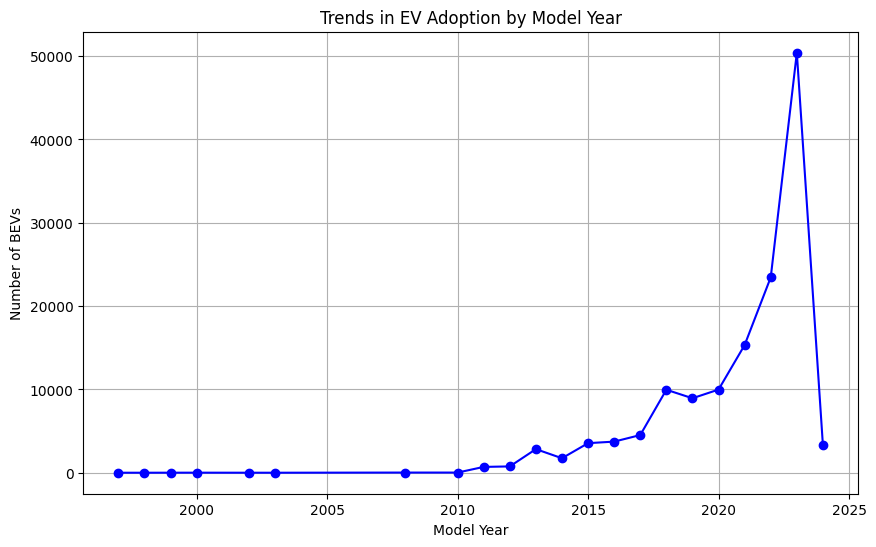

In [30]:
# Analyze trends in EV adoption by looking at the count of BEVs (Battery Electric Vehicles) by Model Year
ev_adoption_trends = ev_population_data[ev_population_data['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']

# Group by Model Year and count the number of vehicles in each year
ev_adoption_by_year = ev_adoption_trends.groupby('Model Year').size().reset_index(name='Vehicle Count')

# Plot the trends in EV adoption by Model Year
import matplotlib.pyplot as plt

trend_EV_Adoption_path = 'tend in EV adoption.png'
plt.figure(figsize=(10, 6))
plt.plot(ev_adoption_by_year['Model Year'], ev_adoption_by_year['Vehicle Count'], marker='o', color='b')
plt.title('Trends in EV Adoption by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of BEVs')
plt.grid(True)
plt.savefig(trend_EV_Adoption_path)
plt.show()


In [31]:
# Analyze the relationship between CAFV eligibility and Base MSRP (vehicle price)
gov_incentive_analysis = ev_population_data[['Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Base MSRP']].groupby('Clean Alternative Fuel Vehicle (CAFV) Eligibility').agg(
    average_base_msrp=('Base MSRP', 'mean'),
    vehicle_count=('Base MSRP', 'size')
).reset_index()

# Display the analysis results
gov_incentive_analysis


,Clean Alternative Fuel Vehicle (CAFV) Eligibility,average_base_msrp,vehicle_count
0,Clean Alternative Fuel Vehicle Eligible,2028.102999,66331
1,Eligibility unknown as battery range has not b...,0.000000,91950
2,Not eligible due to low battery range,2876.873628,19585


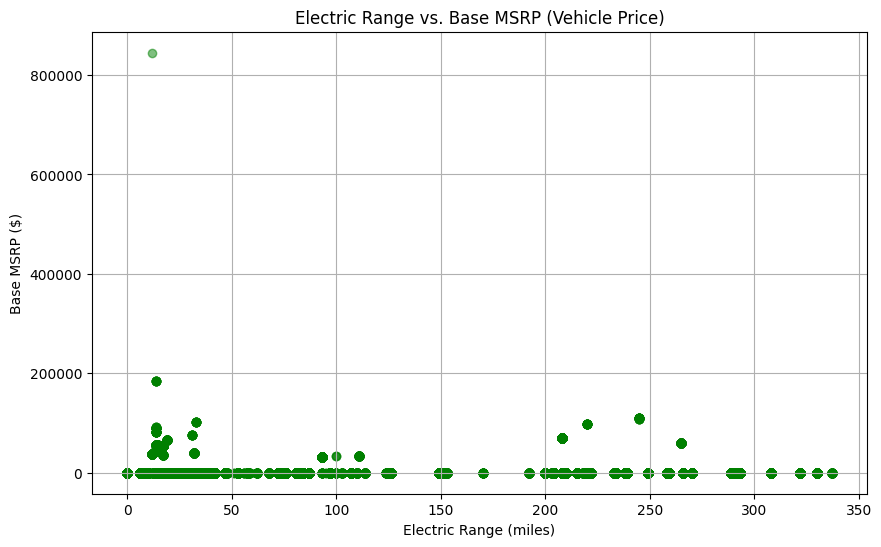

In [33]:
# Analyze the relationship between Electric Range and Base MSRP (vehicle price)
range_vs_msrp_analysis = ev_population_data[['Electric Range', 'Base MSRP']].dropna()

# Plot the relationship between Electric Range and Base MSRP
electric_range_vs_base_MSRP_path = 'electric_range_vs_base_MSRP.png'
plt.figure(figsize=(10, 6))
plt.scatter(range_vs_msrp_analysis['Electric Range'], range_vs_msrp_analysis['Base MSRP'], alpha=0.5, color='green')
plt.title('Electric Range vs. Base MSRP (Vehicle Price)')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.grid(True)
plt.savefig(electric_range_vs_base_MSRP_path)
plt.show()


In [3]:
pip install ace_tools

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Re-import necessary libraries after the environment reset
import pandas as pd

# Define the new criteria, weights, and scores
criteria = ['Charging Infrastructure', 'Charging Time Efficiency', 'Vehicle Range', 'Upfront Costs of EVs', 'Others']
weights = [0.25, 0.20, 0.15, 0.30, 0.10]
scores = [5, 4, 3, 4, 2]

# Calculate the weighted scores
weighted_scores = [w * s for w, s in zip(weights, scores)]

# Combine the results into a DataFrame for easy visualization
score_data_new = pd.DataFrame({
    'Criteria': criteria,
    'Weight': weights,
    'Score': scores,
    'Weighted Score': weighted_scores
})


score_data_new


,Criteria,Weight,Score,Weighted Score
0,Charging Infrastructure,0.25,5,1.25
1,Charging Time Efficiency,0.20,4,0.80
2,Vehicle Range,0.15,3,0.45
3,Upfront Costs of EVs,0.30,4,1.20
4,Others,0.10,2,0.20


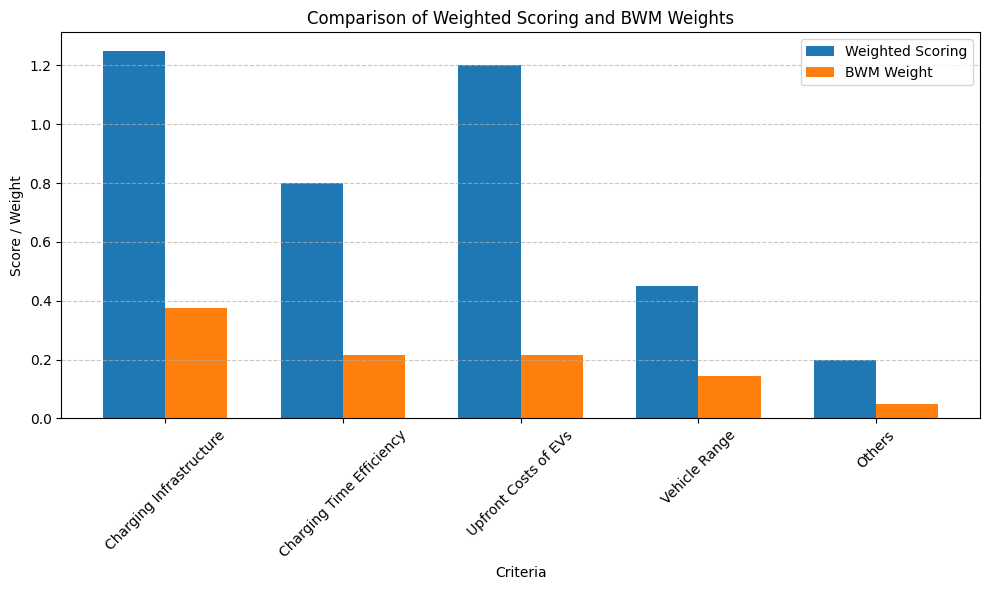

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data again after state reset
data = {
    'Criteria': [
        'Charging Infrastructure',
        'Charging Time Efficiency',
        'Upfront Costs of EVs',
        'Vehicle Range',
        'Others'
    ],
    'Weighted Scoring': [1.25, 0.80, 1.20, 0.45, 0.20],
    'BWM Weight': [0.376, 0.216, 0.216, 0.144, 0.048]
}

# Create a DataFrame
df = pd.DataFrame(data)
comparison_wsm_vs_bwm_path = 'comparison_wsm_vs_bwm_result.png'

# Plotting a comparison bar chart
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35
x = range(len(df))

ax.bar(x, df['Weighted Scoring'], width=width, label='Weighted Scoring', align='center')
ax.bar([p + width for p in x], df['BWM Weight'], width=width, label='BWM Weight', align='center')

ax.set_xlabel('Criteria')
ax.set_ylabel('Score / Weight')
ax.set_title('Comparison of Weighted Scoring and BWM Weights')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(df['Criteria'], rotation=45)
ax.legend()

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(comparison_wsm_vs_bwm_path)
plt.show()
